In [8]:
%matplotlib inline
import pandas as pd
import emsalib as emsa
import matplotlib.pyplot as plt
import timeit
import numpy as np


In [12]:
dataset_path = 'data/AliceShort.csv'
header = pd.read_csv(dataset_path, nrows=1, header=None)
header = header.values[0]
alice = pd.read_csv(dataset_path)

In [16]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis0 = alice['Axis1'].values
emsa0 = emsa.EMSA(flt_type='ma', filterLen = 5, searchOrd= 15)
pts = 15
iLen = np.array(range(10, len(ts), len(ts)//pts))
avgTimes = 10
timedResult = []

for i in iLen:
    axis = emsa.TimeSeries(ts=ts[0:i], ys=axis0[0:i])
    t = timeit.repeat(stmt="motifs = emsa0.process(axis)", number=1, repeat=avgTimes, globals=globals())
    timedResult.append(np.mean(t))



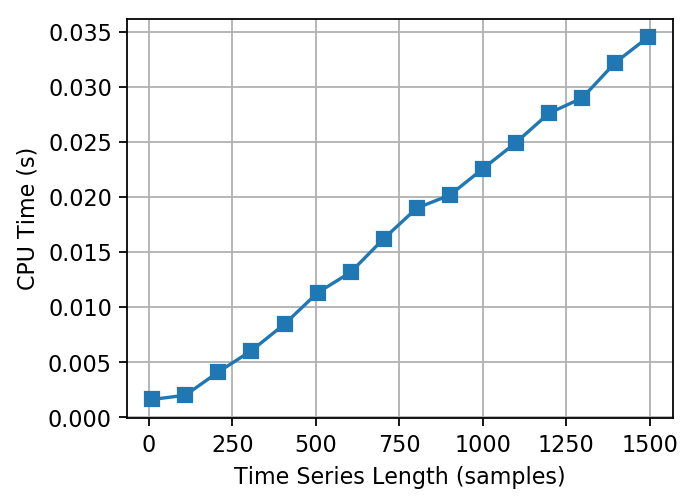

In [17]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.plot(iLen, timedResult, marker='s')
plt.grid()
plt.ylabel('CPU Time (s)')
plt.xlabel('Time Series Length (samples)')
plt.savefig('Runtime_TS_len.png', bbox_inches="tight", pad_inches=0)